# Modul 03

## Session 03 Supervised Learning Classification

## Decision Tree

What to do in this chapter:
1. Apply decision Tree Calssification
    * target: quality (quality > 6, --> Y = 1)
    * features: density, alcohol
2. Validate the model using accuracy in 20% test data
3. Apply scaling and validate the model using accuracy in 20% testing data
4. Check the performance: Is there any difference whether we applied scaling or not?
5. Check the tree: Is there any difference whether we applied scaling or not?

In [23]:
import pandas as pd
import numpy as np

In [46]:
wine = pd.read_csv('./datasets/winequality-white.csv', delimiter=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [47]:
wine['label'] = np.where(wine['quality'] > 6, 1, 0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## EDA

In [48]:
import seaborn as sns

<AxesSubplot:xlabel='density', ylabel='alcohol'>

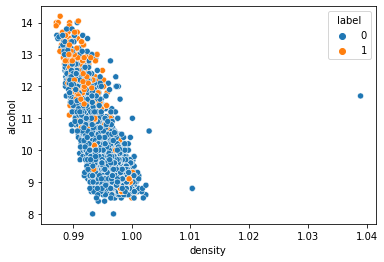

In [49]:
sns.scatterplot(x='density', y='alcohol', hue='label', data=wine)

## Data Splitting

In [50]:
X = wine[['alcohol', 'density']]
y = wine['label']

## Decision Tree without Scaling

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Model

In [52]:
tree = DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)

In [53]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [54]:
y_pred_class = tree.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred_class)

0.8112244897959183

[Text(279.0, 453.0, 'alcohol <= 10.85\nentropy = 0.759\nsamples = 3918\nvalue = [3059, 859]\nclass = bad'),
 Text(139.5, 271.8, 'alcohol <= 10.25\nentropy = 0.475\nsamples = 2474\nvalue = [2222, 252]\nclass = bad'),
 Text(69.75, 90.59999999999997, 'entropy = 0.394\nsamples = 1879\nvalue = [1733, 146]\nclass = bad'),
 Text(209.25, 90.59999999999997, 'entropy = 0.676\nsamples = 595\nvalue = [489, 106]\nclass = bad'),
 Text(418.5, 271.8, 'alcohol <= 12.55\nentropy = 0.982\nsamples = 1444\nvalue = [837, 607]\nclass = bad'),
 Text(348.75, 90.59999999999997, 'entropy = 0.95\nsamples = 1161\nvalue = [732, 429]\nclass = bad'),
 Text(488.25, 90.59999999999997, 'entropy = 0.951\nsamples = 283\nvalue = [105, 178]\nclass = good')]

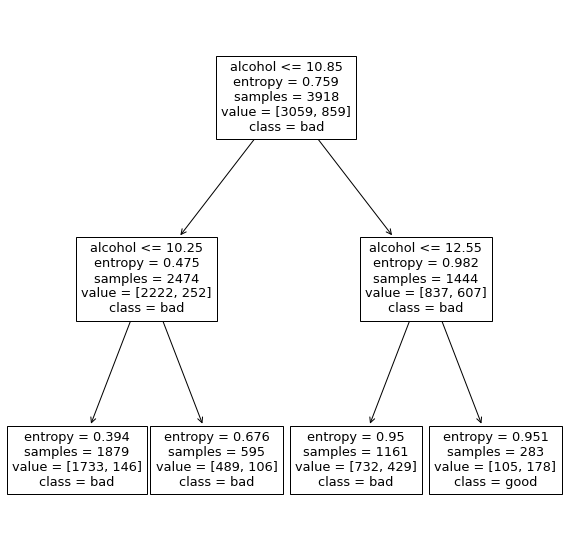

In [56]:
plt.figure(figsize=(10,10))
plot_tree(tree, feature_names=list(X), class_names=['bad', 'good'])

## Decision Tree with Scaling

### Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [60]:
tree_scaled = DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)

In [61]:
tree_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [62]:
y_pred_scaled = tree_scaled.predict(X_test_scaled)

In [63]:
accuracy_score(y_test, y_pred_scaled)

0.8112244897959183

[Text(279.0, 453.0, 'alcohol <= 0.46\nentropy = 0.759\nsamples = 3918\nvalue = [3059, 859]\nclass = bad'),
 Text(139.5, 271.8, 'alcohol <= 0.363\nentropy = 0.475\nsamples = 2474\nvalue = [2222, 252]\nclass = bad'),
 Text(69.75, 90.59999999999997, 'entropy = 0.394\nsamples = 1879\nvalue = [1733, 146]\nclass = bad'),
 Text(209.25, 90.59999999999997, 'entropy = 0.676\nsamples = 595\nvalue = [489, 106]\nclass = bad'),
 Text(418.5, 271.8, 'alcohol <= 0.734\nentropy = 0.982\nsamples = 1444\nvalue = [837, 607]\nclass = bad'),
 Text(348.75, 90.59999999999997, 'entropy = 0.95\nsamples = 1161\nvalue = [732, 429]\nclass = bad'),
 Text(488.25, 90.59999999999997, 'entropy = 0.951\nsamples = 283\nvalue = [105, 178]\nclass = good')]

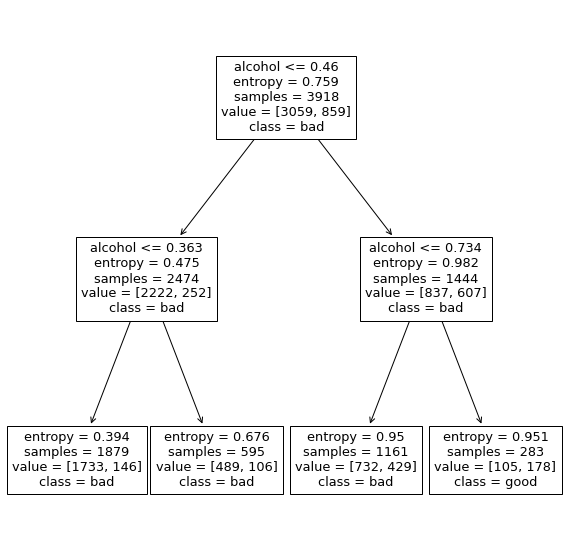

In [65]:
plt.figure(figsize=(10,10))
plot_tree(tree_scaled, feature_names=list(X), class_names=['bad', 'good'])